In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from skimage.color import rgb2gray


In [8]:
# Define the directory containing your photos
photos_directory ="F:/modelai/FingerPrintModel/fingerprint_recognition-master/fingerprint_recognition-master/fingerprint_recognition-master/file/Cropped_Fingerprints(2)/Ziad/"

# Define the pattern to match image files (you can adjust this pattern if needed)
image_files_pattern = "*.bmp"

# Get a list of file paths matching the pattern
photo_paths = glob.glob(photos_directory + image_files_pattern)
# Display the list of photo paths
print("Photo paths:")
for path in photo_paths:
    print(path)

Photo paths:
F:/modelai/FingerPrintModel/fingerprint_recognition-master/fingerprint_recognition-master/fingerprint_recognition-master/file/Cropped_Fingerprints(2)/Ziad\605_M_Left_index_finger.bmp
F:/modelai/FingerPrintModel/fingerprint_recognition-master/fingerprint_recognition-master/fingerprint_recognition-master/file/Cropped_Fingerprints(2)/Ziad\605_M_Left_little_finger.bmp
F:/modelai/FingerPrintModel/fingerprint_recognition-master/fingerprint_recognition-master/fingerprint_recognition-master/file/Cropped_Fingerprints(2)/Ziad\605_M_Left_middle_finger.bmp
F:/modelai/FingerPrintModel/fingerprint_recognition-master/fingerprint_recognition-master/fingerprint_recognition-master/file/Cropped_Fingerprints(2)/Ziad\605_M_Left_ring_finger.bmp
F:/modelai/FingerPrintModel/fingerprint_recognition-master/fingerprint_recognition-master/fingerprint_recognition-master/file/Cropped_Fingerprints(2)/Ziad\605_M_Left_thumb_finger.bmp
F:/modelai/FingerPrintModel/fingerprint_recognition-master/fingerprint_

In [9]:
# Define a dictionary to map finger names to numbers
finger_mapping = {'thumb': 0, 'index': 1, 'middle': 2, 'ring': 3, 'little': 4}
# Initialize lists to store image data and target labels
image_data = []
target_labels = []
for filename in os.listdir(photos_directory):
    if filename.endswith(".bmp"):
        # subject_id, gender, lr, finger, _ = filename.split('_')
        # # gender, lr, finger, _ = etc.split('_')
        # gender = 0 if gender == 'M' else 1
        # lr = 0 if lr =='Left' else 1
        
        # if finger == 'thumb':
        #     finger = 0
        # elif finger == 'index':
        #     finger = 1
        # elif finger == 'middle':
        #     finger = 2
        # elif finger == 'ring':
        #     finger = 3
        # elif finger == 'little':
        #     finger = 4
        # target_labels.append([subject_id, gender, lr, finger])
        path = photos_directory + filename
        img = Image.open(path) 
        print(img.size)
        if img.mode != 'RGB':
            img = img.convert('RGB')
        resized_photo = img.resize((90, 144))      
        img_np_array = np.array(resized_photo)
        gray_image = rgb2gray(img_np_array)
        gray_image = np.expand_dims(gray_image, axis=-1)
        real_photo = gray_image.astype(np.float32)  
        # print(path,real_photo.shape,real_photo.size)
        # plt.figure(figsize=(8, 4))
        # plt.subplot(1, 3, 1)
        # plt.imshow(real_photo.squeeze(),cmap='gray')
        image_data.append(real_photo)

# Convert the list of lists to a NumPy array
target_labels = np.array(target_labels)

# Convert lists to NumPy arrays
image_data = np.array(image_data)
target_labels = np.array(target_labels)

(184, 304)
(184, 295)
(184, 313)
(193, 287)
(237, 357)
(149, 287)
(175, 304)
(184, 278)
(175, 339)
(228, 330)


(10, 144, 90, 1)


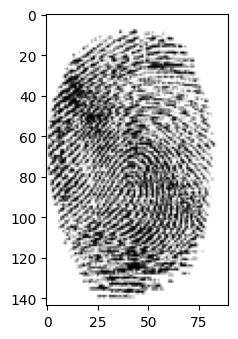

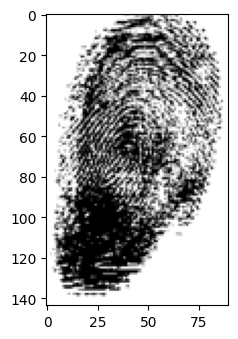

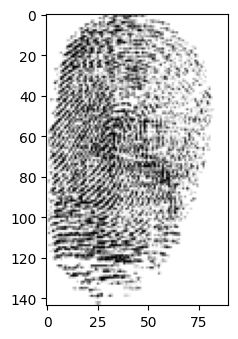

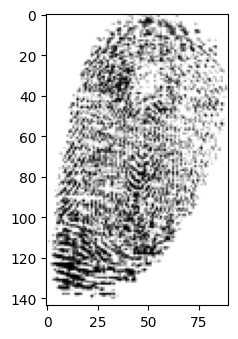

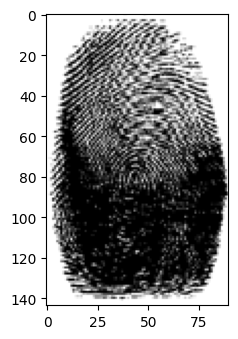

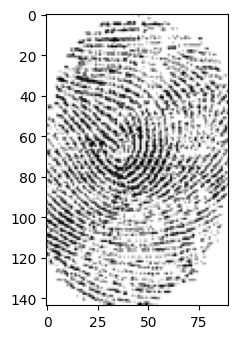

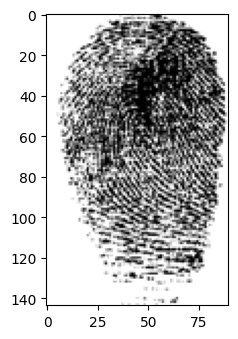

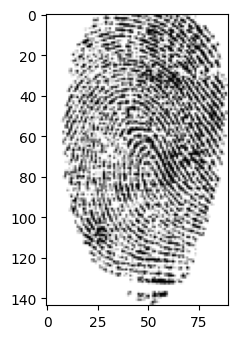

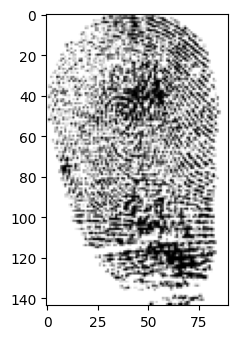

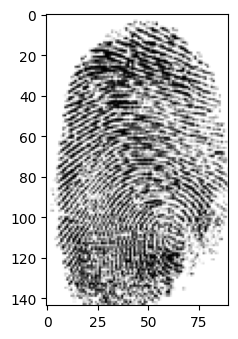

In [10]:
print(image_data.shape)
for i in range(len(image_data)):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 3, 1)
    # plt.title(target_labels[i])
    plt.imshow(image_data[i].squeeze(),cmap='gray')

In [11]:
with open('foot.npz', 'wb') as logo_file:
  np.save(logo_file, image_data)

In [12]:
with open('target2.npy', 'wb') as logo_file:
  np.save(logo_file,target_labels )

In [14]:
X = np.load('foot.npz')
Y = np.load('target2.npy')

(144, 90, 1)


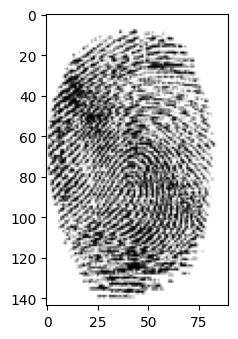

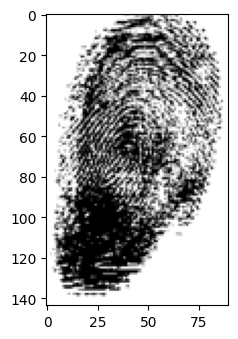

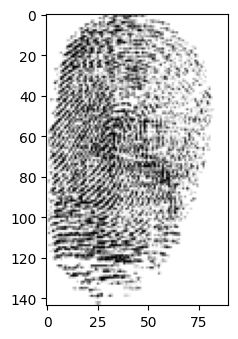

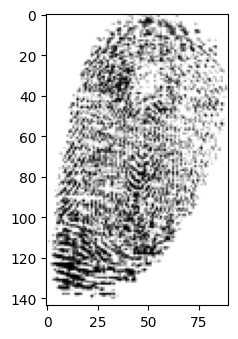

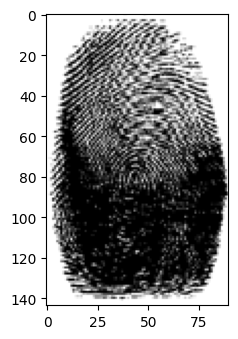

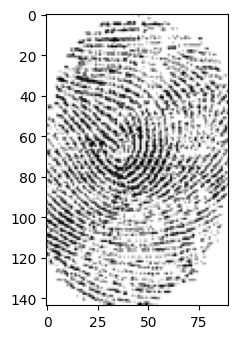

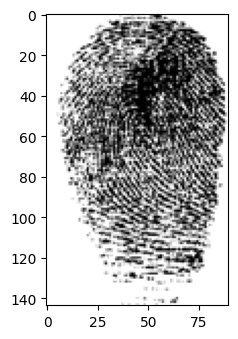

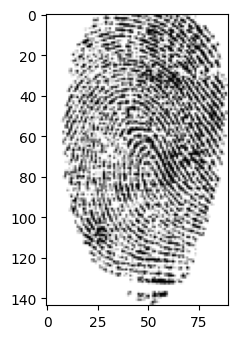

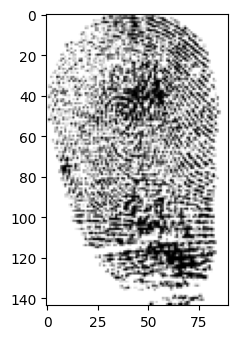

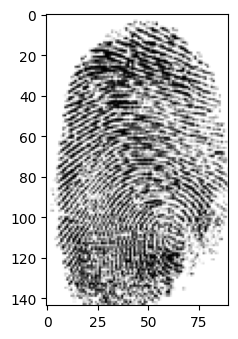

In [16]:
print(X[9].shape)
for i in range(len(X)):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 3, 1)
    # plt.title(Y[i])
    plt.imshow(X[i].squeeze(),cmap='gray')